In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

import pymc3 as pm

from modules.layers import LSTM, Dense

from sktime.datasets.base import load_airline

In [4]:
X = load_airline().values
X = (X - X.mean()) - X.std()
 
input_x = []
input_y = []

for i in range(len(X) - 5):
    
    input_x.append(X[i: i+5])
    input_y.append(X[i+5])
    
input_x = np.array(input_x).reshape((-1, 5, 1))
input_y = np.array(input_y)

In [5]:
with pm.Model() as rnn:
    
    data = pm.Data('X', input_x)
    target = pm.Data('y', input_y)
    
    h, c = LSTM(
        shapes=(input_x.shape[0], input_x.shape[1], input_x.shape[2]),
        units=5,
        layer_name=1,
        prior=pm.Normal,
        mu=0,
        sigma=1
    )(data)
    
    mu = Dense(
        shape_in=5, 
        units=1,
        layer_name=2,
        prior=pm.Normal,
        activation='linear',
        mu=0,
        sigma=1,
    )(h)
    
    out = pm.Normal(
        'out',
        mu=mu,
        sigma=2,
        observed=target
    )

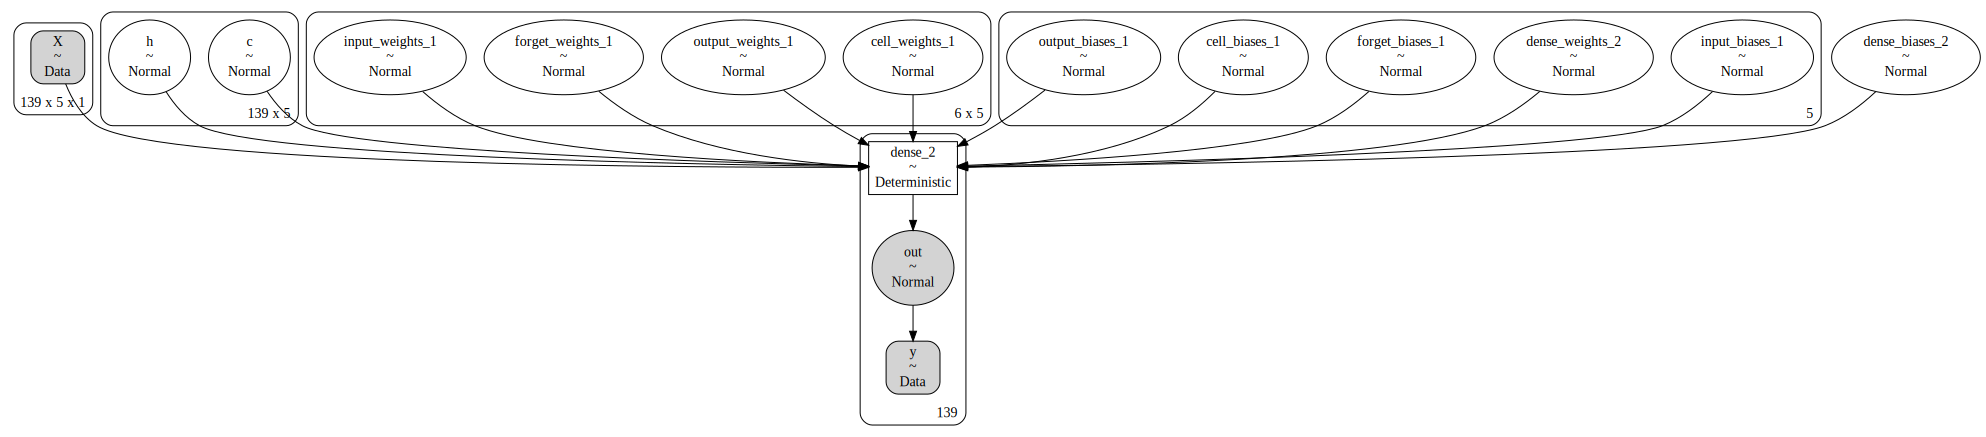

In [7]:
pm.model_to_graphviz(rnn)

In [ ]:
with rnn:
    
    approx = pm.fit(n=10000)

C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\theano\gpuarray\dnn.py:192: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn(
